# Raft Data
---
[Alejandro Ciuba](https://alejandrociuba.github.io), alejandrociuba@pitt.edu
---
## Summary

Just some useful information to serve us in the developer experience aspect of our paper.
---
## Setup
### Necessary Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Settings

In [2]:
# Turn this off
%pprint
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

Pretty printing has been turned OFF


### Globals

In [3]:
PATH = "raft.csv"
raft = pd.read_csv(PATH)

In [4]:
raft.info()
raft.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Stars                               130 non-null    float64
 1   Name                                146 non-null    object 
 2   Primary Authors                     145 non-null    object 
 3   Language                            146 non-null    object 
 4   License                             134 non-null    object 
 5   Leader Election + Log Replication?  146 non-null    object 
 6   Persistence?                        74 non-null     object 
 7   Membership Changes?                 146 non-null    object 
 8   Log Compaction?                     146 non-null    object 
dtypes: float64(1), object(8)
memory usage: 10.4+ KB


,Stars,Name,Primary Authors,Language,License,Leader Election + Log Replication?,Persistence?,Membership Changes?,Log Compaction?
0,26505.0,RethinkDB,NaN,C++,Apache-2.0,Yes,Yes,Yes,Yes
1,14448.0,TiKV,"Jay, ngaut, siddontang, tiancaiamao",Rust,Apache-2.0,Yes,Yes,Yes,Yes
2,12450.0,Seastar Raft,"Gleb Natapov, Konstantin Osipov, Pavel Solodov...",C++20,AGPL,Yes,Yes,Yes,Yes
3,10079.0,nebula-graph-storage,"Sherman Ye, Doodle Wang",C++,Apache-2.0,Yes,Yes,Yes,Yes
4,3776.0,braft,"Zhangyi Chen, Yao Wang",C++,Apache-2.0,Yes,Yes,Yes,Yes


---
## Implementation Overview

/tmp/ipykernel_14807/1225758014.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=75)


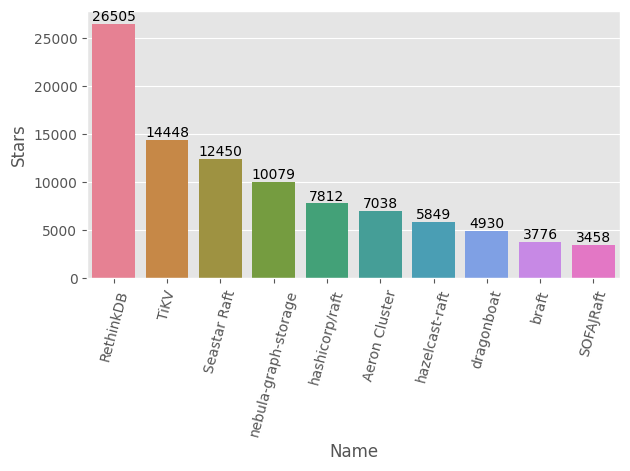

In [9]:
ax = sns.barplot(data=raft.nlargest(10, columns=["Stars"]), y="Stars", x="Name", hue="Name",  orient="x")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=75)

for i in ax.containers:
    ax.bar_label(i)

plt.tight_layout()
# ax.set_title("Most Popular Raft APIs")
plt.savefig("figures/most-pop.pdf", format="pdf")

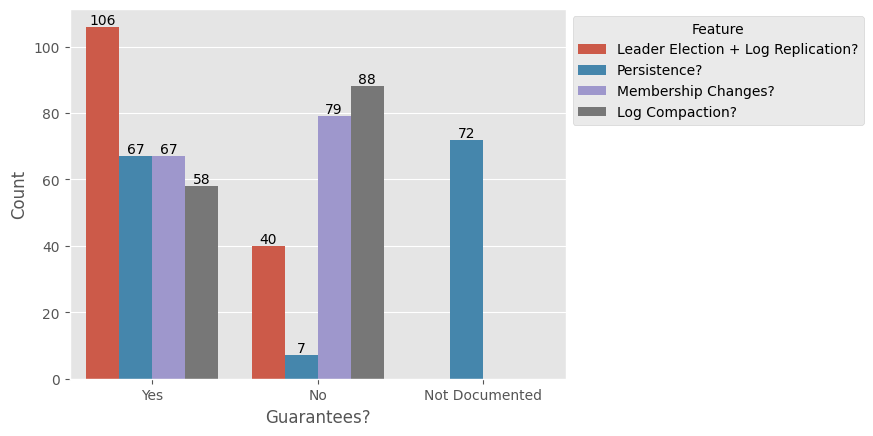

In [6]:
view = raft.melt(id_vars=["Name"], value_vars=["Leader Election + Log Replication?", "Persistence?", "Membership Changes?", "Log Compaction?"],
                 var_name="Feature", value_name="Guarantees?")

view["Guarantees?"] = view["Guarantees?"].map(lambda x: "Not Documented" if pd.isna(x) else x)

ax = sns.countplot(data=view, x="Guarantees?", hue="Feature")

for i in ax.containers:
    ax.bar_label(i)

ax.set_ylabel("Count")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Text(0.5, 1.0, 'Implemented Languages\nn=146')

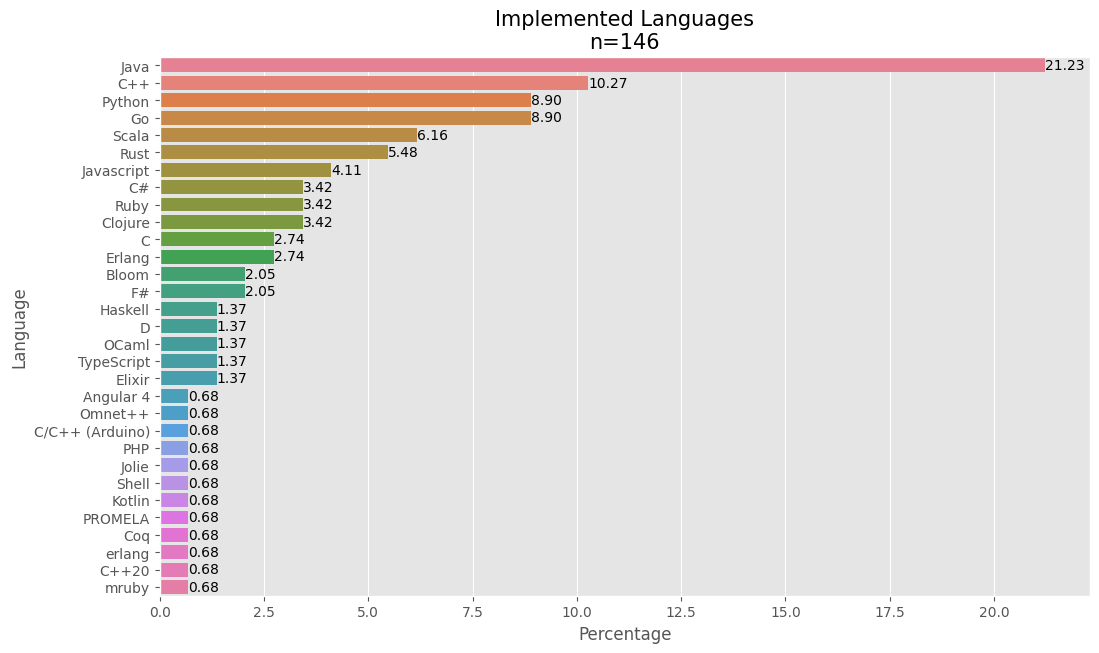

In [7]:
ordering = raft["Language"].value_counts().index

fig, ax = plt.subplots(figsize=(12,7))
ax = sns.countplot(data=raft, y="Language", hue="Language", 
                   stat="percent", orient="y",
                   order=ordering, hue_order=ordering)
ax.set_xlabel("Percentage")

for i in ax.containers:
    ax.bar_label(i, fmt="{:.2f}")

ax.set_title(f"Implemented Languages\nn={len(raft)}", size=15)